In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F

class model(nn.Module):
    """ ReLU k shallow neural network
    Parameters: 
    input size: input dimension
    hidden_size1 : number of hidden layers 
    num_classes: output classes 
    k: degree of relu functions
    """
    def __init__(self, input_size, hidden_size1, num_classes,k = 1):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, num_classes,bias = False)
        self.k = k 
    def forward(self, x):
        u1 = self.fc2(F.relu(self.fc1(x))**self.k)
        return u1

def print_convergence_order(err, neuron_num_exponent): 

    neuron_nums = [2**j for j in range(2,neuron_num_exponent)]
    err_list = [err[i] for i in neuron_nums ] 

    print("neuron num \t\t error \t\t order")
    for i, item in enumerate(err_list):
        if i == 0: 
            print(neuron_nums[i], end = "\t\t")
            print(item, end = "\t\t")
            print("*")
        else: 
            print(neuron_nums[i], end = "\t\t")
            print(item, end = "\t\t") 
            print(np.log(err_list[i-1]/err_list[i])/np.log(2))

def compute_rate(k,d):
    return 0.5 + (2*k +1)/(2*d)

for k in range(1,6): 
    print(k, compute_rate(k,10))


1 0.65
2 0.75
3 0.85
4 0.95
5 1.05


## ex1 

In [2]:
folder = './'
experiment_label = '10DGaussian'
err_list_relu_4_rand = []
for k in [1]: 
    for N0 in [2**7, 2**8, 2**9, 2**10,2**11,2**12,2**13]: 

        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k, N0))

        filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k, N0,num_epochs)
        err = torch.load(filename)  
        err_list_relu_4_rand.append(err) 
        print_convergence_order(err,exponent+1) 


print() 


# folder = 'ex1/'
# experiment_label = 'ex1'
# err_list_relu_4_rand2 = []
# for k in [1]: 
#     for N0 in [2**14,2**15,2**16]: 

#         exponent = 10 
#         num_epochs=  2**exponent 
#         print("relu {}, dict size {}".format(k, N0))

#         filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k, N0,num_epochs)
#         err = torch.load(filename)  
#         err_list_relu_4_rand2.append(err) 
#         print_convergence_order(err,exponent+1) 


# print() 



relu 1, dict size 128
neuron num 		 error 		 order
4		tensor(0.0853, dtype=torch.float64)		*
8		tensor(0.0775, dtype=torch.float64)		tensor(0.1385, dtype=torch.float64)
16		tensor(0.0642, dtype=torch.float64)		tensor(0.2720, dtype=torch.float64)
32		tensor(0.0387, dtype=torch.float64)		tensor(0.7280, dtype=torch.float64)
64		tensor(0.0208, dtype=torch.float64)		tensor(0.8980, dtype=torch.float64)
128		tensor(0.0121, dtype=torch.float64)		tensor(0.7856, dtype=torch.float64)
256		tensor(0.0068, dtype=torch.float64)		tensor(0.8362, dtype=torch.float64)
512		tensor(0.0040, dtype=torch.float64)		tensor(0.7395, dtype=torch.float64)
relu 1, dict size 256
neuron num 		 error 		 order
4		tensor(0.0932, dtype=torch.float64)		*
8		tensor(0.0760, dtype=torch.float64)		tensor(0.2938, dtype=torch.float64)
16		tensor(0.0618, dtype=torch.float64)		tensor(0.2997, dtype=torch.float64)
32		tensor(0.0357, dtype=torch.float64)		tensor(0.7898, dtype=torch.float64)
64		tensor(0.0201, dtype=torch.float64)		te

0

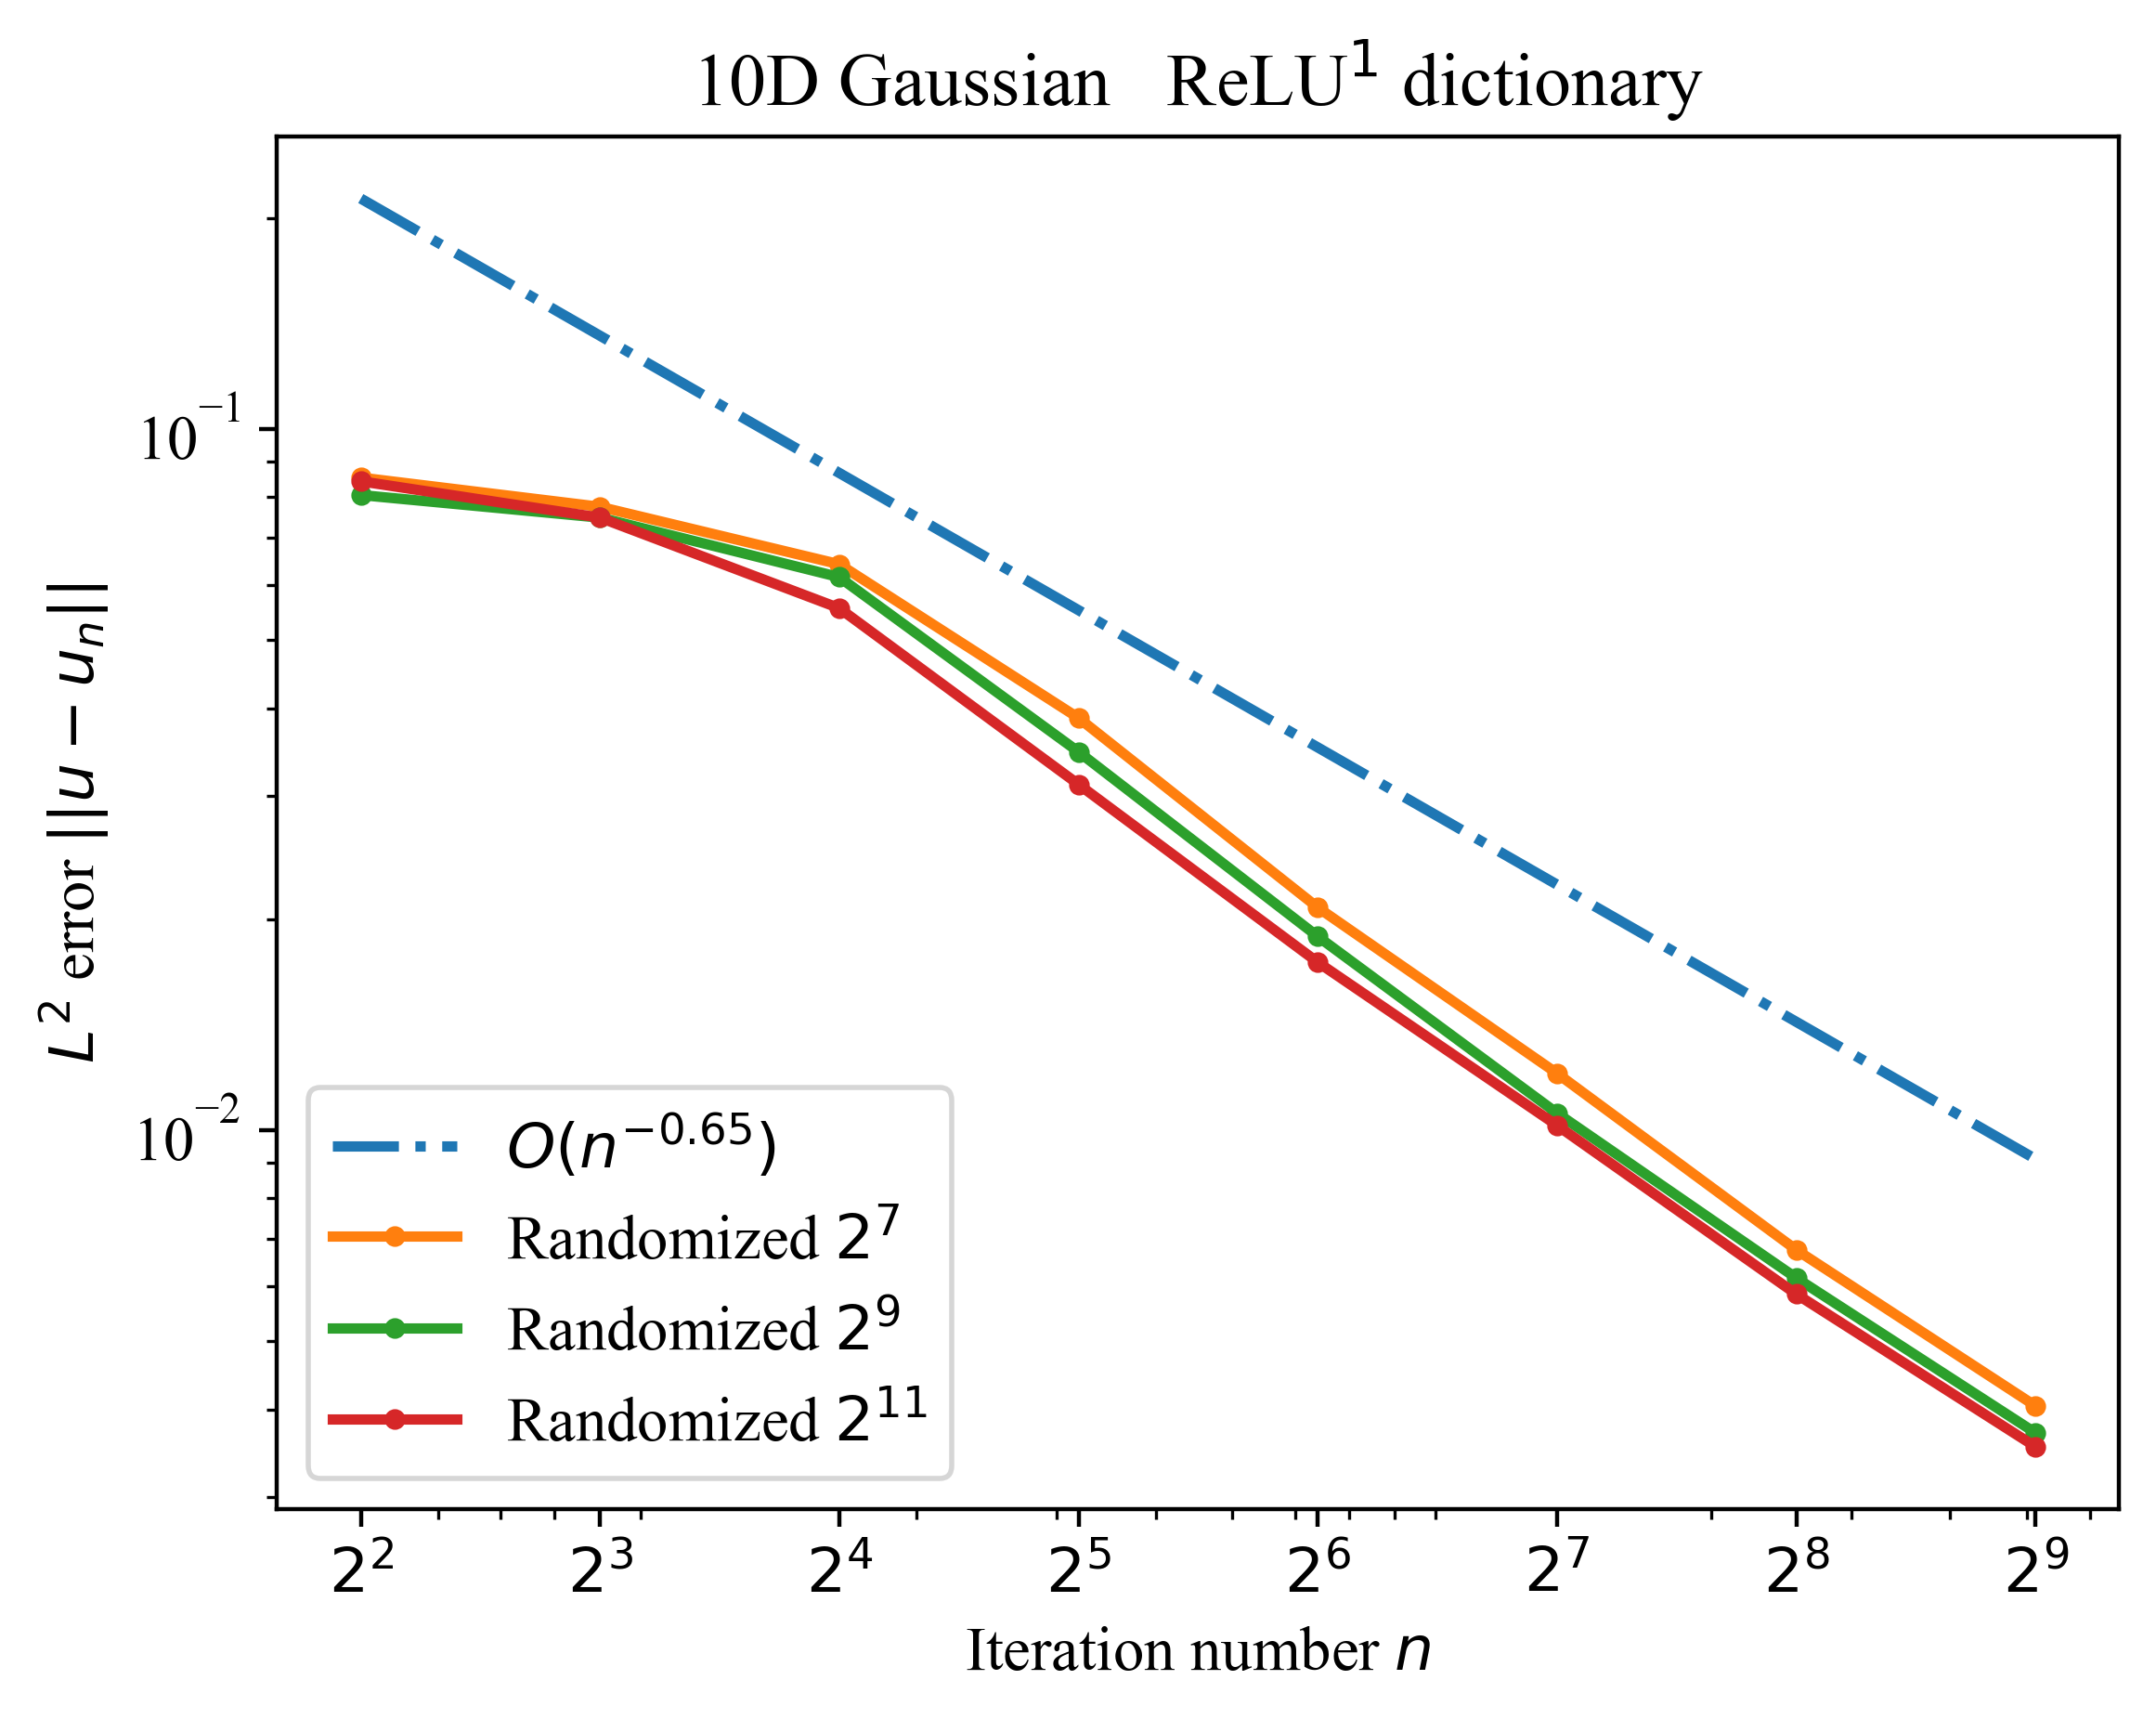

In [3]:

def plot_err_vs_neurons_10d(k,d,err_list_relu_4_rand,filename, fig_title, exponent = 9, save = False, rescale = 6):
    """ Neuron numbers 2^2, 2^3, 2^4, ..., 2^9. 
    """
    rate = -1/2 - (2 * k + 1)/(2 * d)

    f_size = 12  # Increased font size
    line_width = 2  # Thickness of the lines
    # Set global font size
    plt.rcParams.update({'font.size': f_size})
    
    neuron_nums = np.array([2**j for j in range(2,exponent+1)])  
    rand_size_exp_list = [7,8,9,10,11,12,13,14] 

    neuron_nums2 = np.array([2**j for j in range(2,exponent+2)])  
    rand_size_exp_list2 = [14,15,16] 

    plt.figure(dpi = 400)
    x = np.array(range(4, 2**(exponent) +1))
    ref = err_list_relu_4_rand[0][2**2]* (x/ 4)**(rate) * rescale 

    # plt.plot(x,ref,'-.',label = 'optimal rate = {}'.format(rate))
    plt.plot(x,ref,'-.',linewidth=line_width,label = '$O(n^{{{}}})$'.format(rate))

    for i, err in enumerate(err_list_relu_4_rand[:-1]): 
        if i%2 ==0: 
            plt.plot(neuron_nums, err[neuron_nums],'.-',linewidth=line_width,
                     label = "Randomized $2^{{{}}}$".format(rand_size_exp_list[i]))

    # for i, err in enumerate(err_list_relu_4_rand2): 
    #     # if i%2 ==0: 
    #     plt.plot(neuron_nums2, err[neuron_nums2],'.-',label = "Rand dictionary: $2^{{{}}}$".format(rand_size_exp_list2[i]))


    plt.title( fig_title+"   ReLU$^{}$ dictionary".format(k))
    plt.yscale('log')
    plt.xscale('log')
    # plt.grid("True")
    plt.xlabel("Iteration number $n$")
    plt.ylabel("$L^2$ error $||u-u_n||$")
    plt.xticks(neuron_nums,[rf"$2^{{{ns}}}$" for ns in range(2,exponent+1)])
    plt.legend(loc='lower left')    

    if save:
        plt.savefig(filename) 
    else:
        plt.show()
    return 0 
## plot results 
## read data: 

k = 1 
filename = "10D_gaussian_rand_relu{}_Dict.png".format(k)    
d = 10 
save = True  
fig_title = "10D Gaussian"
plot_err_vs_neurons_10d(k,d,err_list_relu_4_rand,filename, fig_title, exponent = 9, save = save, rescale=2.5)

In [4]:
folder = './'
experiment_label = '10DGaussian'
err_list_relu_4_rand = []
for k in [4]: 
    for N0 in [2**7, 2**8, 2**9, 2**10,2**11,2**12,2**13]: 

        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k, N0))

        filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k, N0,num_epochs)
        err = torch.load(filename)  
        err_list_relu_4_rand.append(err) 
        print_convergence_order(err,exponent+1) 




relu 4, dict size 128
neuron num 		 error 		 order
4		tensor(0.2985, dtype=torch.float64)		*
8		tensor(0.2343, dtype=torch.float64)		tensor(0.3497, dtype=torch.float64)
16		tensor(0.1497, dtype=torch.float64)		tensor(0.6457, dtype=torch.float64)
32		tensor(0.0824, dtype=torch.float64)		tensor(0.8610, dtype=torch.float64)
64		tensor(0.0419, dtype=torch.float64)		tensor(0.9781, dtype=torch.float64)
128		tensor(0.0202, dtype=torch.float64)		tensor(1.0493, dtype=torch.float64)
256		tensor(0.0083, dtype=torch.float64)		tensor(1.2909, dtype=torch.float64)
512		tensor(0.0022, dtype=torch.float64)		tensor(1.9225, dtype=torch.float64)
relu 4, dict size 256
neuron num 		 error 		 order
4		tensor(0.2562, dtype=torch.float64)		*
8		tensor(0.1700, dtype=torch.float64)		tensor(0.5919, dtype=torch.float64)
16		tensor(0.1326, dtype=torch.float64)		tensor(0.3586, dtype=torch.float64)
32		tensor(0.0756, dtype=torch.float64)		tensor(0.8099, dtype=torch.float64)
64		tensor(0.0356, dtype=torch.float64)		te

0

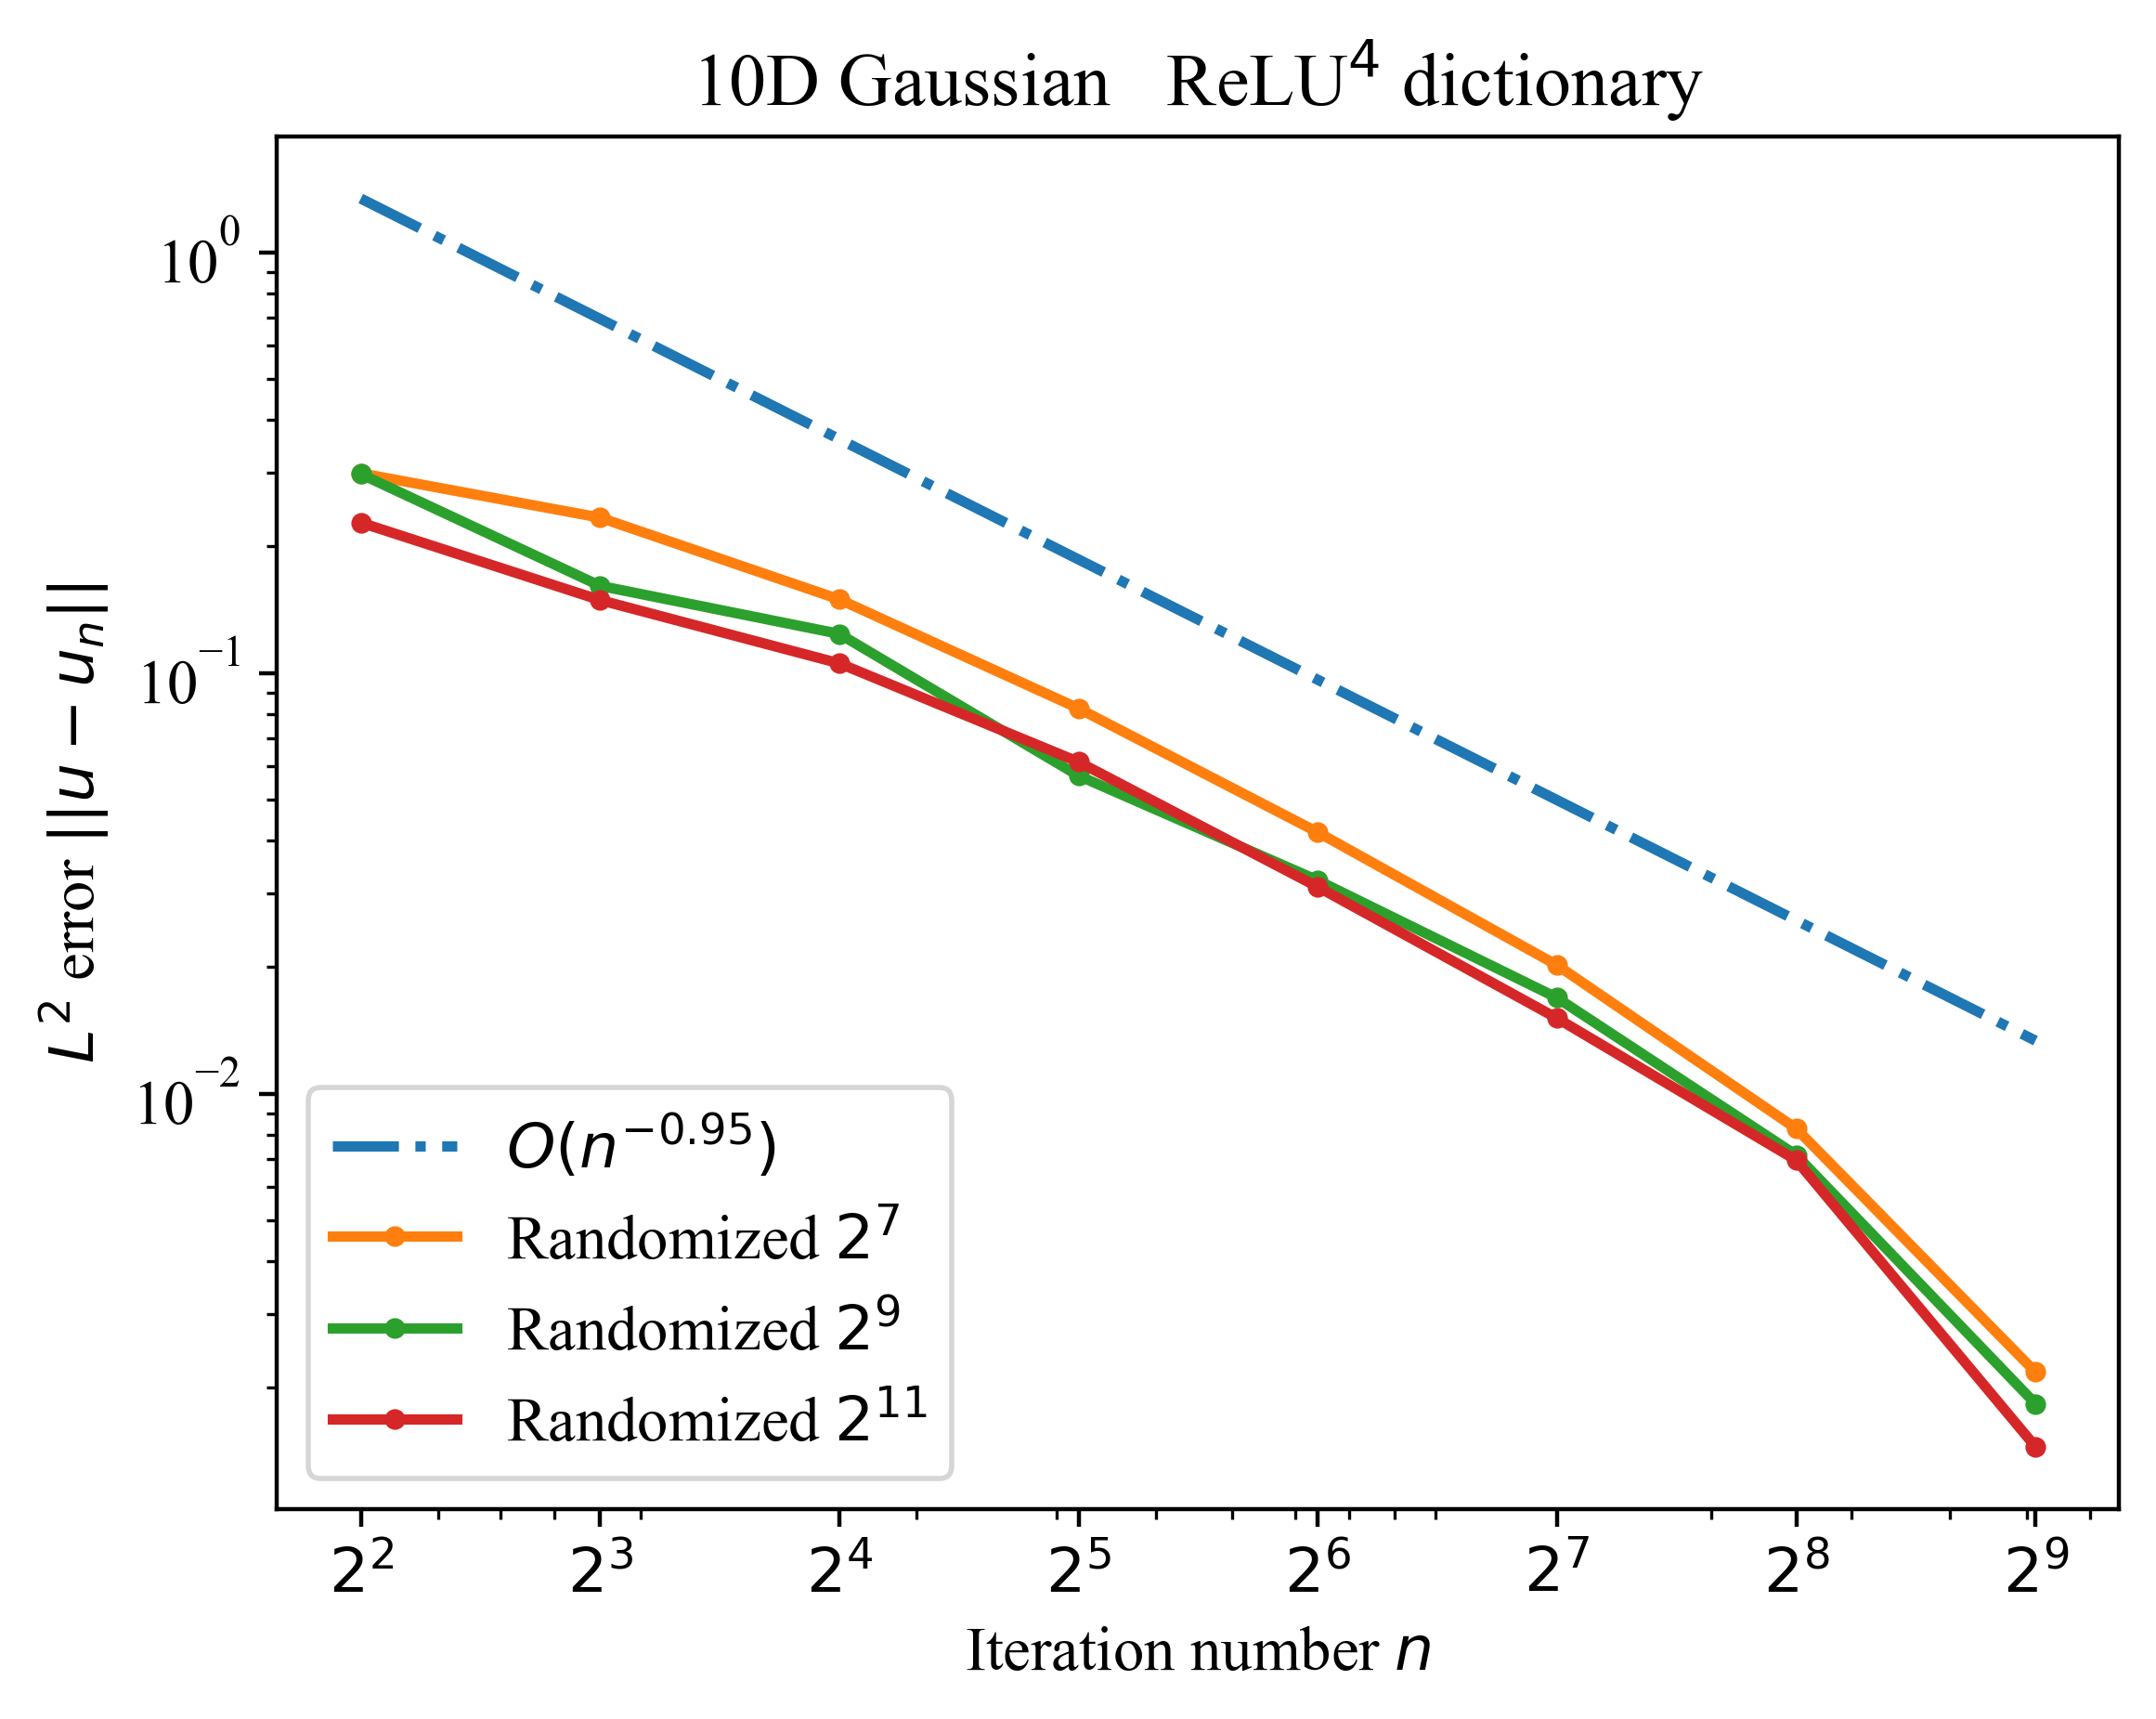

In [5]:

k = 4 
filename = "10D_gaussian_rand_relu{}_Dict.png".format(k)    
d = 10 
fig_title = "10D Gaussian"
save = True 
plot_err_vs_neurons_10d(k,d,err_list_relu_4_rand,filename, fig_title, exponent = 9, save = save, rescale=4.5)